In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')


## If the data has 'label' header

In [43]:
path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,0,0.0,7.534168e-11,6.231124e-10,-7.806000e-10,-8.063316e-10,4.260259e-10,8.792373e-11,-2.653489e-10,2.412203e-10,...,1.956881e-10,2.334939e-10,-7.550422e-11,1.972939e-10,3.158191e-10,2.702473e-10,2.155772e-10,2.427227e-10,-1.328829e-10,-5.014970e-10
1,1,0.0,2.256533e-10,1.718130e-10,1.905604e-11,1.276511e-11,-1.379325e-10,-6.269328e-11,-2.930309e-10,2.040993e-10,...,2.343108e-10,2.950671e-11,-2.800265e-10,1.916018e-10,2.510715e-10,1.861655e-10,-2.830894e-10,2.069608e-10,-7.302684e-11,-2.662402e-10


### If the data has not 'label' header then need to add label in '0' column

In [44]:
# #Load the metadata
# # path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_noise.csv"
# Metadata1=pd.read_csv(path); ## the data here without 'label' header here to add label we write the following format
# # Metadata.head(2)
# Metadata=Metadata1.rename(columns={'0':'label'})

In [45]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((1863, 1428), (1863,))

In [46]:
import sys
import os

from scipy import linalg as LA


np.set_printoptions(precision=3, linewidth=110, suppress=True)




def LDA(data, labels, dim_rescale):
    '''
    Linear Discriminant Analysis
    pass in:
        (i) a raw data array--features encoded in the cols;
            one data instance per row;
        (ii) EV, explanatory variable, is included in D as last column;
        (iii) the LDA flag is set to False so PCA is the default techique;
            if both LDA & EV are set to True then LDA is performed
            instead of PCA
    returns:
        (i) eigenvalues (1D array);
        (ii) eigenvectors (2D array)
        (iii) covariance matrix
    some numerical assertions:
    >>> # sum of the eigenvalues is equal to trace of R
    >>> x = R.trace()
    >>> x1 = eva.sum()
    >>> NP.allclose(x, x1)
    True
    >>> # determinant of R is product of eigenvalues
    >>> q = LA.det(R)
    >>> q1 = NP.prod(eva)
    >>> NP.allclose(q, q1)
    True
    '''
    assert data.shape[0] == labels.shape[0]
    # mean center the data array
    data -= data.mean(axis=0)
    nrow, ndim = data.shape
    # pre-allocate sw, sb arrays (both same shape as covariance matrix)
    # s_wc: array encoding 'within class' scatter
    # s_bc: array encoding 'between class' scatter
    s_wc = np.zeros((ndim, ndim))
    s_bc = np.zeros((ndim, ndim))
    R = np.cov(data.T)
    classes = np.unique(labels)
    for c in range(len(classes)):
        # create an index only for data rows whose class label = classes[c]
        idx = np.squeeze(np.where(labels == classes[c]))
        d = np.squeeze(data[idx,:])
        class_cov = np.cov(d.T)
        s_wc += float(idx.shape[0]) / nrow * class_cov
    s_bc = R - s_wc
    # now solve for w then compute the mapped data
    evals, evecs = LA.eig(s_wc, s_bc)
    np.ascontiguousarray(evals)
    np.ascontiguousarray(evecs)
    # sort the eigenvectors based on eigenvalues sort order
    idx = np.argsort(evals)
    idx = idx[::-1]
    evecs = evecs[:,idx]
    # take just number of eigenvectors = dim_rescale
    evecs_dr = evecs[:,:dim_rescale]
    # multiply data array & remaining set of eigenvectors
    rescaled_data = np.dot(data, evecs_dr)
    return rescaled_data, evecs_dr

In [47]:
#rescaled_data, w = LDA(X_WM_Row_scale, y_WM_Row_scale,50)
a, w1 = LDA(np.asarray(X), np.asarray(y), 50)# X_WM_Row_scale,y_WM_Row_scale

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=3, init='pca')
Y = tsne.fit_transform(a)

(777, 2) (1086, 2)


[]

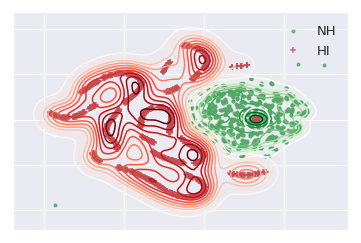

In [49]:
#lb2="Fast RT"
#lb3="Medium RT"
lb1="NH"
lb2="HI"
fileName="tSNE_KDE_plot_edit_2"

a1=Y[np.where(y==0), 0]
b1=Y[np.where(y==0), 1]
c1= Y[np.where(y==1), 0]
d1 = Y[np.where(y==1), 1]
# e1= Y[np.where(y==2), 0]
# f1 = Y[np.where(y==2), 1]

dftt1=pd.concat([pd.DataFrame(a1),pd.DataFrame(b1)], axis=0).transpose()
dftt2=pd.concat([pd.DataFrame(c1),
                pd.DataFrame(d1)], axis=0).transpose()
# dftt3=pd.concat([pd.DataFrame(e1),
#                 pd.DataFrame(f1)], axis=0).transpose()
print dftt1.shape,dftt2.shape#,dftt3.shape
dftt1.columns= ['a','b']
dftt2.columns= ['c','d']
#dftt3.columns= ['e','f']
ax = sns.kdeplot(dftt1['a'],dftt1['b'], cmap="Greens", shade=False, shade_lowest=False)
ax = sns.regplot(dftt1['a'], dftt1['b'],marker= '.', color='g',  fit_reg=False,label=lb1)
ax.legend(loc="best",framealpha=0.0)
# #plt.legend(loc='upper left')
ax = sns.kdeplot(dftt2['c'],dftt2['d'],cmap="Reds", shade=False, shade_lowest=False)
ax = sns.regplot(dftt2['c'], dftt2['d'],marker= '+', color='r',  fit_reg=False, label=lb2)

# ax = sns.kdeplot(dftt3['e'],dftt3['f'],cmap="Blues", shade=False, shade_lowest=False)
# ax = sns.regplot(dftt3['e'], dftt3['f'],marker= '*', color='b',  fit_reg=False, label=lb3)
ax.legend(loc="best",framealpha=0.0)

# Add labels to the plot
red = sns.color_palette("Greens")[-2]
blue = sns.color_palette("Reds")[-2]
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

#sns.despine()
# Save image

# save_format='png'
# print str(fileName)+'.'+save_format
# plt.savefig(fileName+'.'+save_format,dpi=300)

In [50]:
# a1=Y[np.where(y==0), 0]
# b1=Y[np.where(y==0), 1]
# c1= Y[np.where(y==1), 0]
# d1 = Y[np.where(y==1), 1]

In [51]:
# Y[np.where(y==0), 0]